# ワンホットエンコーディング

In [2]:
import pandas as pd
import os
import mglearn

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path,
    header=None,
    index_col=False,
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "gender",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "income",
    ],
)
data = data[
    [
        "age",
        "workclass",
        "education",
        "gender",
        "hours-per-week",
        "occupation",
        "income",
    ]
]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### OneHotEncoderのデモ

In [3]:
import pandas as pd

demo_df = pd.DataFrame({'Integer Features': [0, 1, 2, 1], 'Categorical Features': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Features,Categorical Features
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [4]:
pd.get_dummies(demo_df)

,Integer Features,Categorical Features_box,Categorical Features_fox,Categorical Features_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


連続特徴量でもcolumnsパラメータで明示的に指定するとカテゴリ特徴量として扱うことができる

In [5]:
demo_df['Integer Features'] = demo_df['Integer Features'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Features', 'Categorical Features'])

,Integer Features_0,Integer Features_1,Integer Features_2,Categorical Features_box,Categorical Features_fox,Categorical Features_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


### wave回帰データセットの線形回帰モデルと、決定木回帰の比較

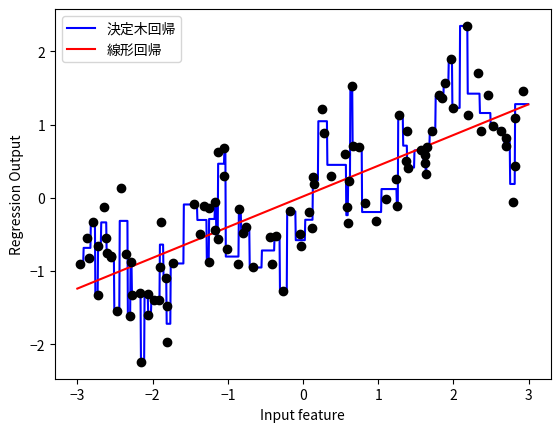

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Noto Sans CJK JP'

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="決定木回帰", color="b")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="線形回帰", color="r")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()


### 特徴量の入力レンジを固定数のbinに詰める

In [7]:
bins = np.linspace(-3, 3, 11)
print("ビンのエッジ:\n", bins)

ビンのエッジ:
 [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [8]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoderで変換する
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


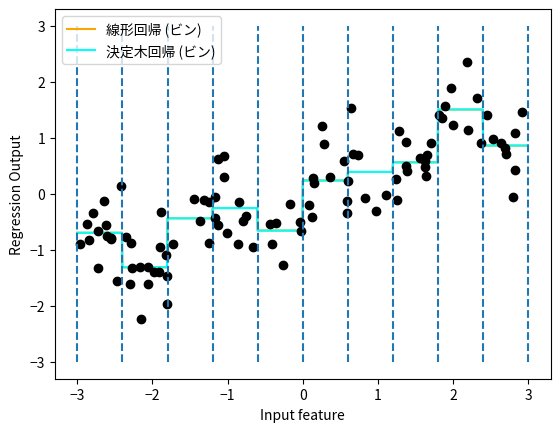

In [10]:

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="線形回帰 (ビン)", color="orange")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="決定木回帰 (ビン)", color="cyan")

plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, ymin=-3, ymax=3, linestyle='--')
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.show()

### 交互作用と多項式

In [11]:
x_combined = np.hstack([X, X_binned])
print(x_combined.shape)

(100, 11)


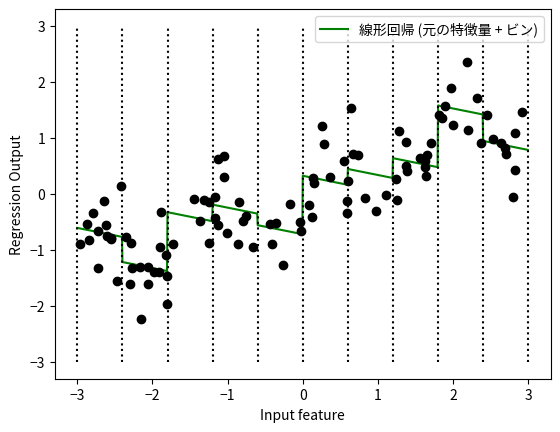

In [12]:

reg = LinearRegression().fit(x_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="線形回帰 (元の特徴量 + ビン)", color="green")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

### 多項式による回帰

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [14]:
print("X.shape: {}".format(X.shape))
print("X_poly.shape: {}".format(X_poly.shape))

X.shape: (100, 1)
X_poly.shape: (100, 10)


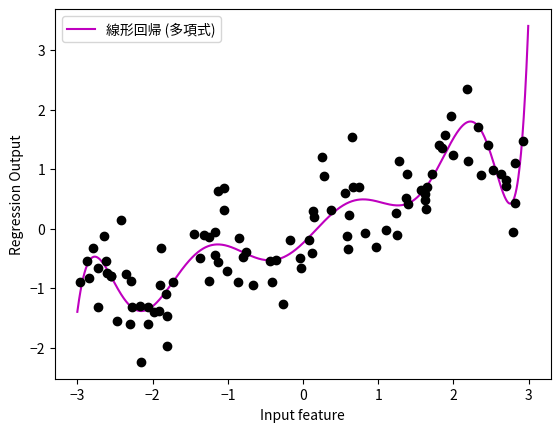

In [15]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label="線形回帰 (多項式)", color="m")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

↑一見スムーズに適合しているように見えるが、境界付近やデータの少ない領域で極端な振る舞いをしてしまう。

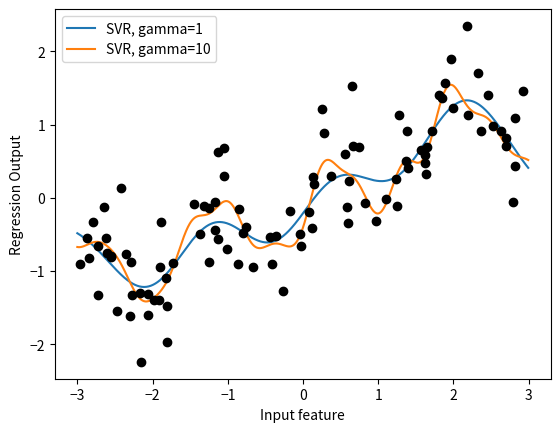

In [16]:
# カーネル法を用いたSVMモデルを変換していないオリジナルデータに適用してみる

from sklearn.svm import SVR

for gamma in [1, 10]:
  svr = SVR(gamma=gamma).fit(X, y)
  plt.plot(line, svr.predict(line), label="SVR, gamma={}".format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()


# 交互作用特徴量 (Interaction Features)

## 定義
交互作用特徴量とは、**2つ以上の特徴量を組み合わせて新しい特徴量を作ること**を指します。  
特に「掛け合わせ（積）」による交互作用がよく使われます。

---

## 数式での表現

2つの説明変数 \( x_1, x_2 \) があり、目的変数 \( y \) を予測する線形回帰モデルを考えます。

通常の線形回帰モデルは次のようになります：

$$
y = w_0 + w_1 x_1 + w_2 x_2
$$

ここに交互作用項 \( x_1 \times x_2 \) を加えると：

$$
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 (x_1 \times x_2)
$$

これにより、**「x1とx2の組み合わせ効果」**もモデルで表現できるようになります。

---

## 例
- \( x_1 = \) 勤務時間（時間/日）  
- \( x_2 = \) 睡眠時間（時間/日）  
- \( y = \) 生産性スコア  

勤務時間と睡眠時間はそれぞれ独立して影響するだけでなく、  
「勤務時間が長い × 睡眠時間が短い」という組み合わせも生産性に強く影響します。  

この関係を捉えるために交互作用項を追加します。

---

## 実装例（scikit-learn）

```python
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

X = pd.DataFrame({
    "x1": [1, 2, 3],
    "x2": [4, 5, 6]
})

# 2次の交互作用のみを生成
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_inter = poly.fit_transform(X)

print(pd.DataFrame(X_inter, columns=poly.get_feature_names_out()))
```

出力例：

```
   x1  x2  x1 x2
0   1   4     4
1   2   5    10
2   3   6    18
```

ここで生成された `x1 x2` が交互作用特徴量です。

---

## 注意点
- 特徴量数が急増するため、多すぎると次元の呪いが発生する  
- 意味のない交互作用も生成される可能性があるため、**特徴量選択や正則化（Lassoなど）**が重要  


### 交互作用特徴量と多項式特徴量をボストン住宅価格のデータに適用してみる

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape, X_test.shape)
print(X_train_poly.shape, X_test_poly.shape)



(379, 13) (127, 13)
(379, 105) (127, 105)


### 単変量非線形変換

In [18]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org)) # 行列の各値にexp(x_ij)を適用し、10倍してからポアソン分布に従う整数に変換
y = np.dot(X_org, w) # (1000, 3) . (3,) = (1000,)

print("Number of feature appearances:\n {}".format(np.bincount(X[:, 0])))

Number of feature appearances:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

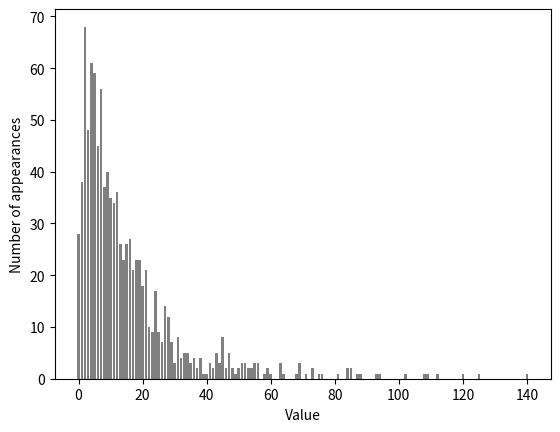

In [19]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [20]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score :{:.3f}".format(score))

Test score :0.622


### 自動特徴量選択

#### 単変量統計

In [21]:
from sklearn.feature_selection import SelectPercentile

↑これを使うと重要な特徴量を単一の特徴量ずつ調べて抽出する。なので特徴量どうしが相互作用するような特徴ベクトルには向かない。

#### モデルベース特徴量選択

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

↑これを使うと各特徴量の交互作用を捉えつつ、重要な特徴量を選択できる。

#### 反復的特徴量選択

単変数量テストとモデルベースの中間で、まったく特徴量をつかわないパターンからある基準が満たされるまで加えていくパターンと、全ての特徴量から１つづつひいていくパターンがある。なのでコストは高い。

Text(0.5, 0, 'Sample index')

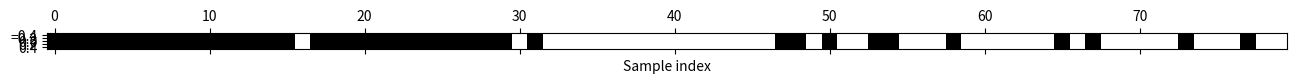

In [23]:
from sklearn.feature_selection import RFE
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

### 4.6　専門家知識の利用

In [24]:
import mglearn
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()) )

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

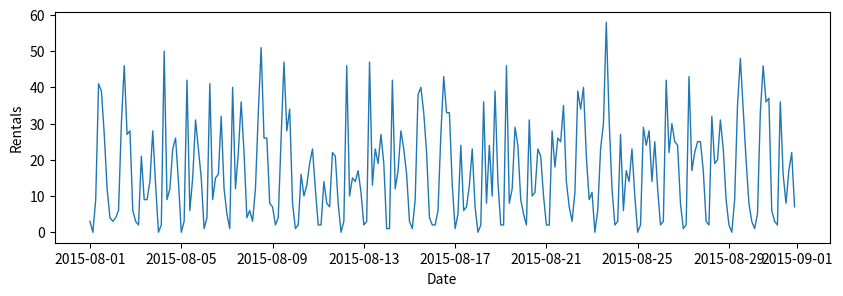

In [27]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

### 最初の184を訓練に、残りの64をテストに利用してみる

In [33]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1)

n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%Y-%m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train), y_pred_train, y_test, '-', label="test")
    
    plt.plot(range(n_train, len(y_test)+n_train),y_pred , '--', label="prediction tests")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    plt.show()


Test set R^2: -0.04


<Figure size 640x480 with 0 Axes>

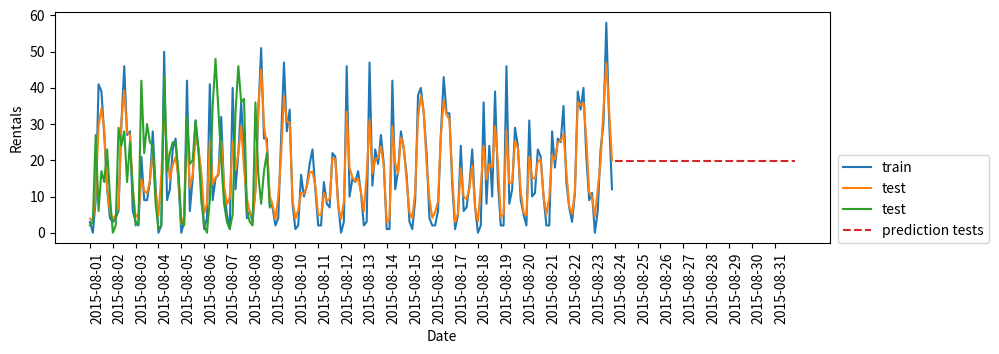

In [34]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)